# Development of regression model to predict car prices

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import pickle
import seaborn as sns

In [2]:
df_cars_raw = pd.read_csv('cars.csv',sep=';',index_col=0)

In [3]:
def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">href</a>'.format(val)

def df_with_href(df):
    return df.style.format({'href': make_clickable})

def df_pretty(df):
    columns = ['header', 'href', 'place', 'price','predicted price', 'price rating',
               'Miltal','Modellår','Tillverkningsår']
    return df_with_href(df = df[columns])

In [4]:
df_cars_raw.describe()

,Miltal,Modellår,Tillverkningsår,price
count,212.000000,212.000000,212.000000,212.000000
mean,7341.837264,2013.726415,2013.481132,97116.632075
std,6561.961058,3.971541,3.946877,55628.213358
min,0.000000,2002.000000,2002.000000,3000.000000
25%,237.500000,2012.000000,2011.000000,54900.000000
50%,6700.000000,2014.000000,2014.000000,84900.000000
75%,11749.500000,2017.000000,2017.000000,148750.000000
max,24749.500000,2018.000000,2018.000000,313873.000000


In [5]:
index = ((df_cars_raw['Miltal'] < 50000) & 
         (df_cars_raw['Miltal'] > 1000) & 
         (df_cars_raw['price'] > 4000))
df_cars = df_cars_raw.loc[index].copy()

In [6]:
df_cars.describe()

,Miltal,Modellår,Tillverkningsår,price
count,146.00000,146.000000,146.000000,146.000000
mean,10468.14726,2012.020548,2011.787671,67352.390411
std,5328.93142,3.418952,3.392098,33925.473098
min,1250.00000,2002.000000,2002.000000,6000.000000
25%,6125.00000,2011.000000,2010.250000,47050.000000
50%,10125.00000,2013.000000,2012.000000,64900.000000
75%,14175.87500,2014.750000,2014.000000,87093.750000
max,24749.50000,2017.000000,2017.000000,169900.000000


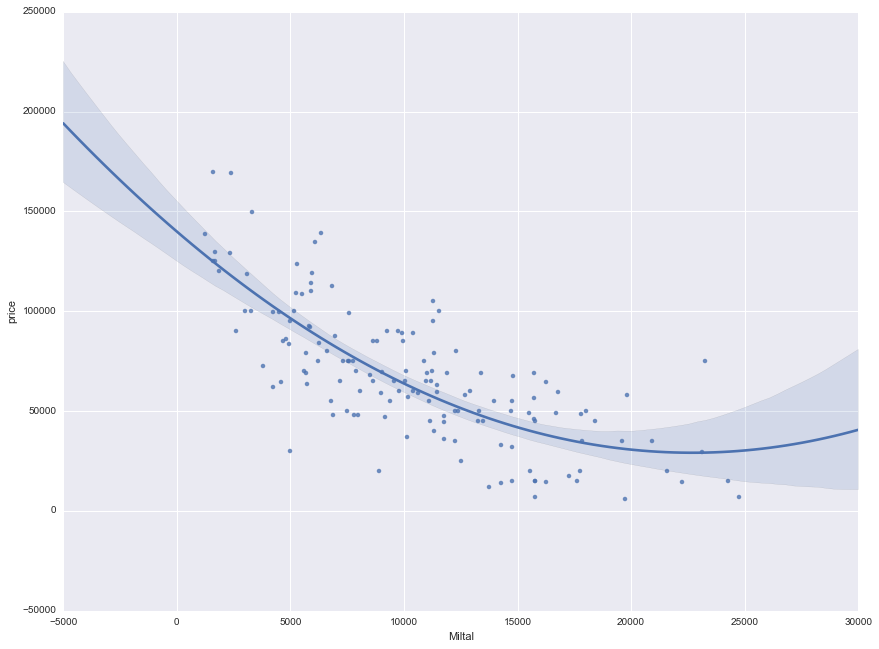

In [7]:
a = sns.lmplot(x="Miltal", y="price", data=df_cars,order=2)
a.fig.set_size_inches(15,10)

In [8]:
linear_regression = LinearRegression()

In [9]:
y = df_cars['price']
#feature_colums = ['Miltal','Modellår','Tillverkningsår','Hästkrafter']
feature_colums = ['Miltal','Modellår','Tillverkningsår']
X = df_cars[feature_colums].copy()
X.dropna(axis = 1,inplace = True)

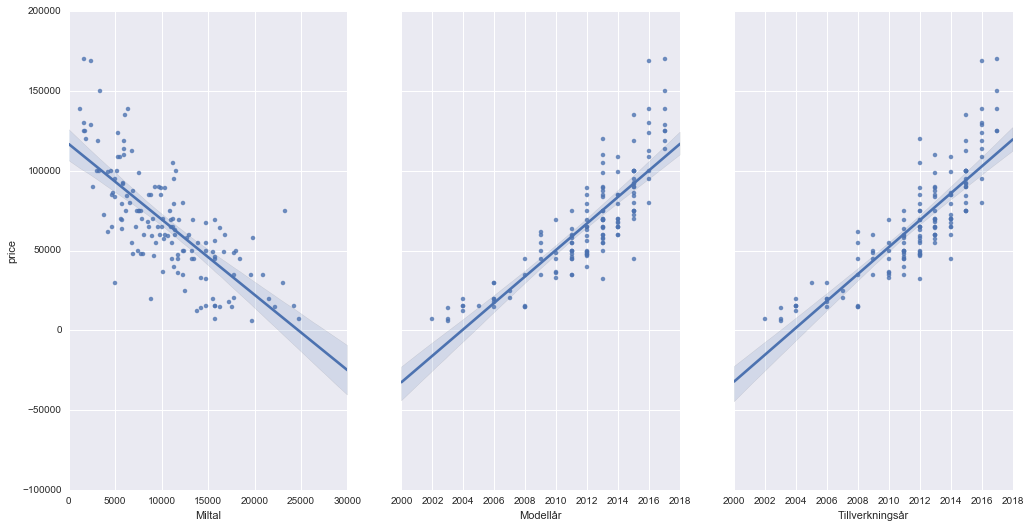

In [10]:
a = sns.pairplot(data = df_cars,x_vars = feature_colums,y_vars=['price'],kind = 'reg',)
a.fig.set_size_inches(15,10)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [12]:
degree = 2
model = make_pipeline(PolynomialFeatures(degree), linear_regression)

r2s = []
for i in range(20):

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)

0.76460505085220365

In [13]:
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [14]:
pickle.dump(model, open('model.pkl', 'wb'))

In [15]:
df_cars['predicted price'] = model.predict(df_cars[feature_colums])
df_cars['price rating'] = df_cars['price'] / df_cars['predicted price']

In [16]:
df_with_href(df_cars.sort_values(by = 'price rating'))

In [17]:
index = df_cars['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_cars.loc[index]

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,header,price,car type,predicted price,price rating
80790572,Diesel,15749.5,2008.0,2008.0,Manuell,"Renault Kangoo 1,5 (6 växlad) -08",45000.0,kangoo,27119.571965,1.659318


In [18]:
df_cars['car type'].unique()

array(['kangoo', 'berlingo', 'partner', 'caddy'], dtype=object)

In [19]:
degree = 2
kangoo_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
index = df_cars['car type'] == 'kangoo'
df_kangoo = df_cars.loc[index].copy()

r2s = []
for i in range(20):

    kangoo_model.fit(X_train, y_train)
    y_predict = kangoo_model.predict(X_test)
    r2 = r2_score(y_test, y_predict)
    r2s.append(r2)
np.mean(r2s)


0.76460504950532626

In [20]:
kangoo_model.fit(df_kangoo[feature_colums],df_kangoo['price'])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [21]:
df_kangoo['predicted price'] = model.predict(df_kangoo[feature_colums])
df_kangoo['price rating'] = df_kangoo['price'] / df_kangoo['predicted price']
df_with_href(df_kangoo.sort_values(by = 'price rating'))

In [22]:
index = df_kangoo['header'] == 'Renault Kangoo 1,5 (6 växlad) -08'
df_kangoo.loc[index]

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,header,price,car type,predicted price,price rating
80790572,Diesel,15749.5,2008.0,2008.0,Manuell,"Renault Kangoo 1,5 (6 växlad) -08",45000.0,kangoo,27119.571964,1.659318


In [23]:
index = df_kangoo['header'] == 'Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09'
df_kangoo.loc[index]



,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,header,price,car type,predicted price,price rating
80603429,Bensin,6800.0,2009.0,2008.0,Manuell,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,54900.0,kangoo,46388.693046,1.183478


In [24]:
df_cars.head()

,Bränsle,Miltal,Modellår,Tillverkningsår,Växellåda,header,price,car type,predicted price,price rating
80790572,Diesel,15749.5,2008.0,2008.0,Manuell,"Renault Kangoo 1,5 (6 växlad) -08",45000.0,kangoo,27119.571965,1.659318
80603429,Bensin,6800.0,2009.0,2008.0,Manuell,Renault Kangoo 1.6|5-Sits|6800Mil|Fullservad -09,54900.0,kangoo,46388.693051,1.183478
80304471,Diesel,11227.0,2013.0,2013.0,Manuell,Citroën BERLINGO III VAN 1.6HDI 90HK DRAG 3-S -13,69900.0,berlingo,66161.259600,1.056510
80917124,Diesel,11200.0,2014.0,2013.0,Automat,Citroën Berlingo III 3 Sits Auto 1.6 HDi Skåp -14,64900.0,berlingo,68118.727087,0.952748
80916193,Diesel,11749.5,2012.0,2012.0,Automat,Citroën Berlingo 1.6 HDi AUT Dragkrok -12,47500.0,berlingo,57337.635382,0.828426


In [25]:
index = ((df_cars['Biltyp'] == 'Kombi') & 
         (df_cars['Miltal'] < 15000) &
         (df_cars['Tillverkningsår'] > 2007) &
         
         (~df_cars['header'].str.contains('Skåp')) & 
         (~df_cars['header'].str.contains('SKÅP')) &
         (~df_cars['header'].str.contains('HDi')) &
         (~df_cars['header'].str.contains('HDI')) &
         (~df_cars['header'].str.contains('Hdi')) &
         
         
         (~df_cars['header'].str.contains('TDI')) &
         
         (~df_cars['header'].str.contains('SÅLD')) 
         
         
         
        
        )
df_selected = df_cars.loc[index]

df_pretty(df_selected.sort_values(by = 'price rating'))

KeyError: 'Biltyp'